In [1]:
from qiskit import *
%matplotlib inline

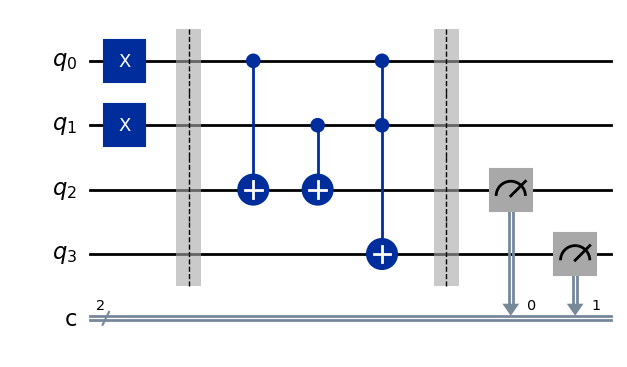

In [13]:
circuit = QuantumCircuit(4, 2)
circuit.x(0) # initalize input A
circuit.x(1) # initalize input B
circuit.barrier()

### YOUR CODE GOES HERE ###
circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(2, 0) # measure SUM
circuit.measure(3, 1) # measure CARRY-OUT
circuit.draw(output='mpl');

In [14]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1).result()
counts = result.get_counts()
print(f'SUM is {list(counts.keys())[0][1]}')
print(f'CARRY-OUT is {list(counts.keys())[0][0]}')

SUM is 0
CARRY-OUT is 1


## Reasoning

The sum output can be seen as an XOR gate applied to the inputs. Using a single CNOT from each of the inputs will flip it only once if either of them is 1, and will flip it twice if they both are 1. This achieves the XOR functionality.

For the carry output we can simply use a Toffoli (or CCX) gate, which is equivalent to an AND gate in classical computing.